In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
sns.set()
sns.set_palette("colorblind")

In [16]:
logdir = Path('/data/logs/')

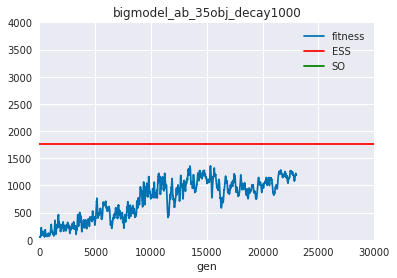

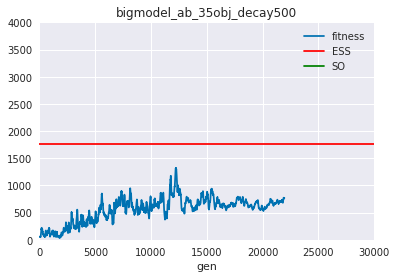

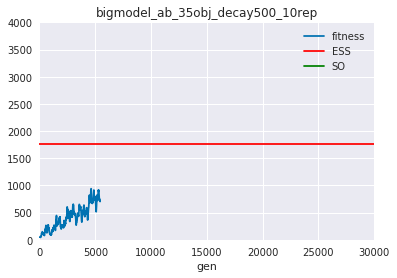

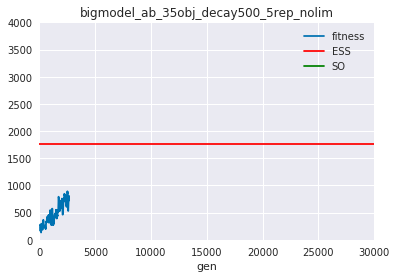

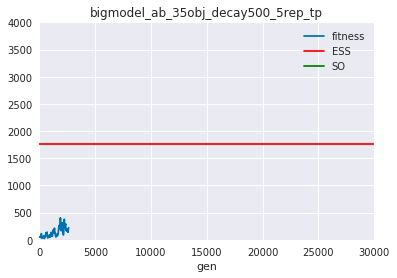

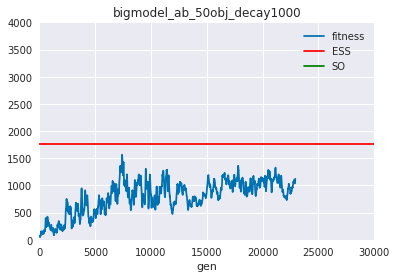

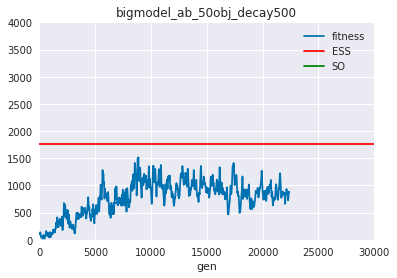

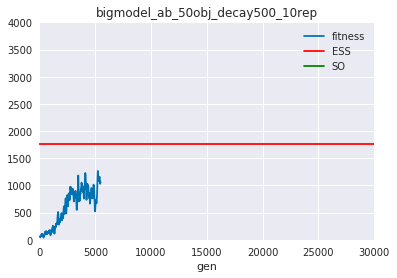

In [17]:
rsize = 50

for path in sorted(list(logdir.glob('bigmodel_ab_*'))):
    plt.figure()
    df = pd.read_csv(path / 'fitnesslog.txt', delimiter="\t")
    df.query('gen < {}'.format(df['gen'].max()-1), inplace=True)
    fit = df.groupby(('gen', 'ind'), as_index=False)['fitness'].mean()
    fit.groupby('gen')['fitness'].median().rolling(rsize).mean().plot()
    #fit.groupby('gen')['fitness'].max().rolling(rsize).mean().plot()
    #fit.groupby('gen')['fitness'].min().rolling(rsize).mean().plot()
    plt.axhline(5000*0.47*0.75, color="r", label="ESS")
    plt.axhline(5000*2*0.75, color="g", label="SO")
    plt.ylim(0, 4000)
    plt.xlim(0, 30000)
    plt.title(path.name)
    plt.legend()